<a href="https://colab.research.google.com/github/YashPareek1/Retail-Sales-Prediction/blob/master/Copy_of_Sample_ML_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name  -  Capstone Project: Capstone - End to End Machine Learning**



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -  Yash Pareek**

Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied. You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [77]:
# Import Librariimport numpy as np
import pandas as pd
from numpy import math
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [78]:
# Load Dataset
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
url = ('/content/drive/MyDrive/Project/ML project/store.csv')

data1 = pd.read_csv(url)

In [80]:
rows_num , col_num = data1.shape
print('the number of rows',rows_num)
print('the number of columns',col_num)

the number of rows 1115
the number of columns 10


In [81]:
# Load Dataset

url = ('/content/drive/MyDrive/Project/ML project/Rossmann Stores Data.csv')

data2 = pd.read_csv(url)

In [82]:
rows_num , col_num = data2.shape
print('the number of rows',rows_num)
print('the number of columns',col_num)

the number of rows 1017209
the number of columns 9


### Dataset First View

In [83]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [84]:
data1['PromoInterval'].value_counts()

Jan,Apr,Jul,Oct     335
Feb,May,Aug,Nov     130
Mar,Jun,Sept,Dec    106
Name: PromoInterval, dtype: int64

In [85]:
# Dataset First Look
data1.head(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [86]:
data2.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


In [87]:
merged_df = pd.merge(data1, data2, on='Store', how='inner')


In [88]:
merged_df.to_csv('merged_file.csv', index=False)


In [89]:
rows_num , col_num = merged_df.shape
print('the number of rows',rows_num)
print('the number of columns',col_num)

the number of rows 1017209
the number of columns 18


In [90]:
merged_df.head(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,2015-07-27,6102,612,1,1,0,1
5,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,7,2015-07-26,0,0,0,0,0,0
6,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,6,2015-07-25,4364,500,1,0,0,0
7,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,5,2015-07-24,3706,459,1,0,0,0
8,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,4,2015-07-23,3769,503,1,0,0,0
9,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3,2015-07-22,3464,463,1,0,0,0


### Dataset Rows & Columns count

In [91]:
# Dataset Rows & Columns count
rows_num , col_num = merged_df.shape
print('the number of rows',rows_num)
print('the number of columns',col_num)

the number of rows 1017209
the number of columns 18


In [92]:
merged_df.columns


Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'DayOfWeek',
       'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday'],
      dtype='object')

### Dataset Information

In [93]:
# Dataset Info
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   StoreType                  1017209 non-null  object 
 2   Assortment                 1017209 non-null  object 
 3   CompetitionDistance        1014567 non-null  float64
 4   CompetitionOpenSinceMonth  693861 non-null   float64
 5   CompetitionOpenSinceYear   693861 non-null   float64
 6   Promo2                     1017209 non-null  int64  
 7   Promo2SinceWeek            509178 non-null   float64
 8   Promo2SinceYear            509178 non-null   float64
 9   PromoInterval              509178 non-null   object 
 10  DayOfWeek                  1017209 non-null  int64  
 11  Date                       1017209 non-null  object 
 12  Sales                      1017209 non-null  int64  
 13  Customers   

#### Duplicate Values

In [94]:
# Dataset Duplicate Value Count
len(merged_df[merged_df.duplicated()])


0

#### Missing Values/Null Values

In [95]:
# Missing Values/Null Values Count
# Identify missing values (True for missing, False for non-missing)
missing_data = merged_df.isnull().sum().sort_values()

# Count the total number of missing values in the entire dataset
total_missing = missing_data.sum()

# Display the missing value counts
print("Missing Value Counts:")
print(missing_data)

# Display the total number of missing values
print(f"Total Missing Values: {total_missing}")


Missing Value Counts:
Store                             0
Promo                             0
Open                              0
Customers                         0
Sales                             0
Date                              0
DayOfWeek                         0
StateHoliday                      0
SchoolHoliday                     0
Promo2                            0
Assortment                        0
StoreType                         0
CompetitionDistance            2642
CompetitionOpenSinceYear     323348
CompetitionOpenSinceMonth    323348
PromoInterval                508031
Promo2SinceWeek              508031
Promo2SinceYear              508031
dtype: int64
Total Missing Values: 2173431


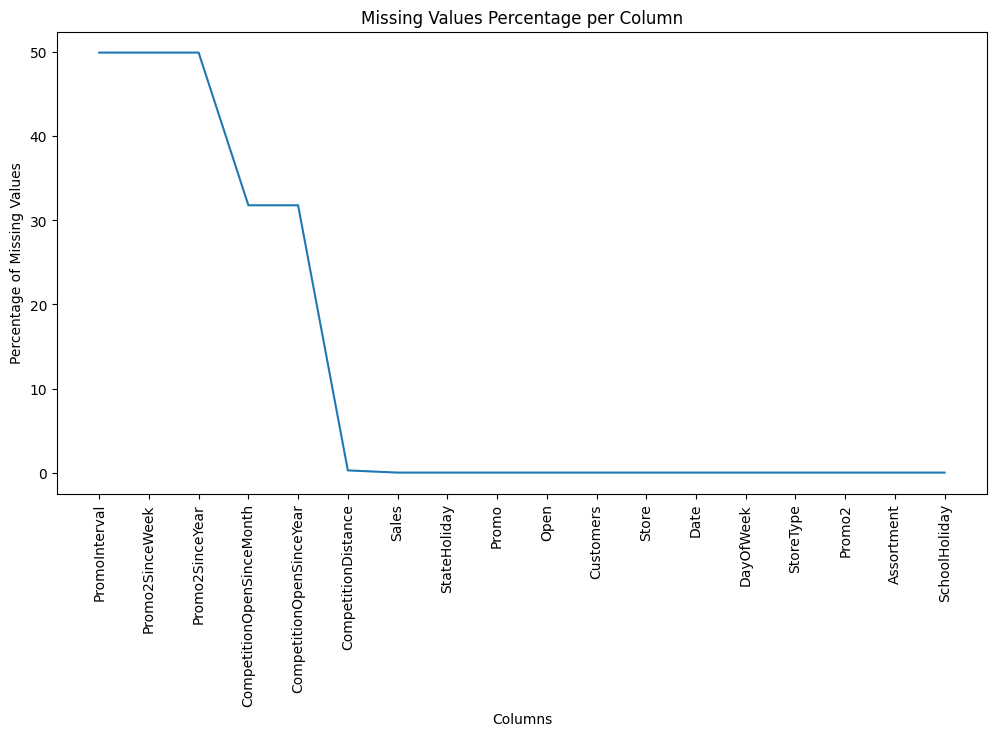

In [96]:
# Calculate the percentage of missing values for each column
missing_percentage = (merged_df.isnull().mean() * 100).sort_values(ascending=False)

# Create a line chart
plt.figure(figsize=(12, 6))
sns.lineplot(x=missing_percentage.index, y=missing_percentage.values)

# Set labels and title
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.title('Missing Values Percentage per Column')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [97]:
#droping missing data column
mean_value = merged_df['CompetitionDistance'].mean()

merged_df['CompetitionDistance'].fillna(mean_value, inplace=True)


In [98]:
# Identify missing values (True for missing, False for non-missing)
missing_data = merged_df.isnull().sum().sort_values()

# Count the total number of missing values in the entire dataset
total_missing = missing_data.sum()

# Display the missing value counts
print("Missing Value Counts:")
print(missing_data)

# Display the total number of missing values
print(f"Total Missing Values: {total_missing}")


Missing Value Counts:
Store                             0
Promo                             0
Open                              0
Customers                         0
Sales                             0
Date                              0
DayOfWeek                         0
StateHoliday                      0
SchoolHoliday                     0
Promo2                            0
CompetitionDistance               0
Assortment                        0
StoreType                         0
CompetitionOpenSinceYear     323348
CompetitionOpenSinceMonth    323348
PromoInterval                508031
Promo2SinceWeek              508031
Promo2SinceYear              508031
dtype: int64
Total Missing Values: 2170789


In [99]:
# Identify missing values (True for missing, False for non-missing)
missing_data = merged_df.isnull().sum().sort_values()

# Count the total number of missing values in the entire dataset
total_missing = missing_data.sum()

# Display the missing value counts
print("Missing Value Counts:")
print(missing_data)

# Display the total number of missing values
print(f"Total Missing Values: {total_missing}")

Missing Value Counts:
Store                             0
Promo                             0
Open                              0
Customers                         0
Sales                             0
Date                              0
DayOfWeek                         0
StateHoliday                      0
SchoolHoliday                     0
Promo2                            0
CompetitionDistance               0
Assortment                        0
StoreType                         0
CompetitionOpenSinceYear     323348
CompetitionOpenSinceMonth    323348
PromoInterval                508031
Promo2SinceWeek              508031
Promo2SinceYear              508031
dtype: int64
Total Missing Values: 2170789


In [100]:
# Forward-fill missing values in 'your_column' based on the previous year's value
merged_df['CompetitionOpenSinceYear'] = merged_df['CompetitionOpenSinceYear'].fillna(method='ffill')


In [101]:
# Forward-fill missing values in 'your_column' based on the previous year's value
merged_df['CompetitionOpenSinceMonth'] = merged_df['CompetitionOpenSinceMonth'].fillna(method='ffill')


In [102]:
merged_df.drop(columns=['PromoInterval'], inplace=True)


In [103]:
merged_df.drop(columns=['Promo2SinceWeek'], inplace=True)


In [104]:
merged_df.drop(columns=['Promo2SinceYear'], inplace=True)


In [105]:
# Identify missing values (True for missing, False for non-missing)
missing_data = merged_df.isnull().sum().sort_values()

# Count the total number of missing values in the entire dataset
total_missing = missing_data.sum()

# Display the missing value counts
print("Missing Value Counts:")
print(missing_data)

# Display the total number of missing values
print(f"Total Missing Values: {total_missing}")

Missing Value Counts:
Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
dtype: int64
Total Missing Values: 0


### What did you know about your dataset?

In [106]:
merged_df.shape

(1017209, 15)

In [107]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 15 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   StoreType                  1017209 non-null  object 
 2   Assortment                 1017209 non-null  object 
 3   CompetitionDistance        1017209 non-null  float64
 4   CompetitionOpenSinceMonth  1017209 non-null  float64
 5   CompetitionOpenSinceYear   1017209 non-null  float64
 6   Promo2                     1017209 non-null  int64  
 7   DayOfWeek                  1017209 non-null  int64  
 8   Date                       1017209 non-null  object 
 9   Sales                      1017209 non-null  int64  
 10  Customers                  1017209 non-null  int64  
 11  Open                       1017209 non-null  int64  
 12  Promo                      1017209 non-null  int64  
 13  StateHoliday

## ***2. Understanding Your Variables***

In [108]:
# Dataset Columns

merged_df.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

### Variables Description

In [109]:
# Dataset Describe
merged_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,5.430086e+03,7.230954e+00,2.008581e+03,5.005638e-01,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,7.705298e+03,3.187480e+00,6.631930e+00,4.999999e-01,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,2.000000e+01,1.000000e+00,1.900000e+03,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,7.100000e+02,4.000000e+00,2.006000e+03,0.000000e+00,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,2.330000e+03,7.000000e+00,2.010000e+03,1.000000e+00,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.880000e+03,1.000000e+01,2.012000e+03,1.000000e+00,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.586000e+04,1.200000e+01,2.015000e+03,1.000000e+00,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


Answer Here

### Check Unique Values for each variable.

In [110]:
# Check Unique Values for each variable.
# Get the number of unique values in each column
unique_counts = merged_df.nunique()

# Print the number of unique values for each column
print("Number of unique values in each column:")
print(unique_counts)


Number of unique values in each column:
Store                         1115
StoreType                        4
Assortment                       3
CompetitionDistance            655
CompetitionOpenSinceMonth       12
CompetitionOpenSinceYear        23
Promo2                           2
DayOfWeek                        7
Date                           942
Sales                        21734
Customers                     4086
Open                             2
Promo                            2
StateHoliday                     5
SchoolHoliday                    2
dtype: int64


## 3. ***Data Wrangling***

### Data Wrangling Code

In [111]:
# Write your code to make your dataset analysis ready.
df = merged_df.copy()

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 15 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   StoreType                  1017209 non-null  object 
 2   Assortment                 1017209 non-null  object 
 3   CompetitionDistance        1017209 non-null  float64
 4   CompetitionOpenSinceMonth  1017209 non-null  float64
 5   CompetitionOpenSinceYear   1017209 non-null  float64
 6   Promo2                     1017209 non-null  int64  
 7   DayOfWeek                  1017209 non-null  int64  
 8   Date                       1017209 non-null  object 
 9   Sales                      1017209 non-null  int64  
 10  Customers                  1017209 non-null  int64  
 11  Open                       1017209 non-null  int64  
 12  Promo                      1017209 non-null  int64  
 13  StateHoliday

In [113]:
df['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [114]:
df['SchoolHoliday'].unique()

array([1, 0])

In [115]:
df['StateHoliday'] = df['StateHoliday'].replace('a', 1)
df['StateHoliday'] = df['StateHoliday'].replace('b', 1)
df['StateHoliday'] = df['StateHoliday'].replace('c', 1)


In [116]:
df.head(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,1,2015-07-27,6102,612,1,1,0,1
5,1,c,a,1270.0,9.0,2008.0,0,7,2015-07-26,0,0,0,0,0,0
6,1,c,a,1270.0,9.0,2008.0,0,6,2015-07-25,4364,500,1,0,0,0
7,1,c,a,1270.0,9.0,2008.0,0,5,2015-07-24,3706,459,1,0,0,0
8,1,c,a,1270.0,9.0,2008.0,0,4,2015-07-23,3769,503,1,0,0,0
9,1,c,a,1270.0,9.0,2008.0,0,3,2015-07-22,3464,463,1,0,0,0


In [117]:
df['Sales'].value_counts()

0        172871
5674        215
5558        197
5483        196
6214        195
          ...  
19268         1
18344         1
17685         1
19544         1
21237         1
Name: Sales, Length: 21734, dtype: int64

In [118]:
df['total_holiday'] = df['StateHoliday'].astype(str)+ df['SchoolHoliday'].astype(str)
print(df['total_holiday'])

0          01
1          01
2          01
3          01
4          01
           ..
1017204    01
1017205    01
1017206    01
1017207    01
1017208    11
Name: total_holiday, Length: 1017209, dtype: object


In [119]:
# Converting the date variable into date format for further analysis
df['date'] = pd.to_datetime(df['Date'],format = "%Y/%m/%d").dt.date

In [120]:
df['month'] = pd.to_datetime(df['date']).dt.month
df['day_of_week'] = pd.to_datetime(df['date']).dt.dayofweek
df['is_weekend']  = df['day_of_week'].apply(lambda x: 1 if x > 4 else 0)   # 1 for weekend and 0 for weekday

### What all manipulations have you done and insights you found?

The StateHoliday variable has ('a,b,c') been converted to integer format to ('1') enhance analysis and computations. Additional variables `total_holiday,'month',`day_of_week`,`is_weekend` have been extracted from the date column for further analysis.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Vizualization base on Sales count

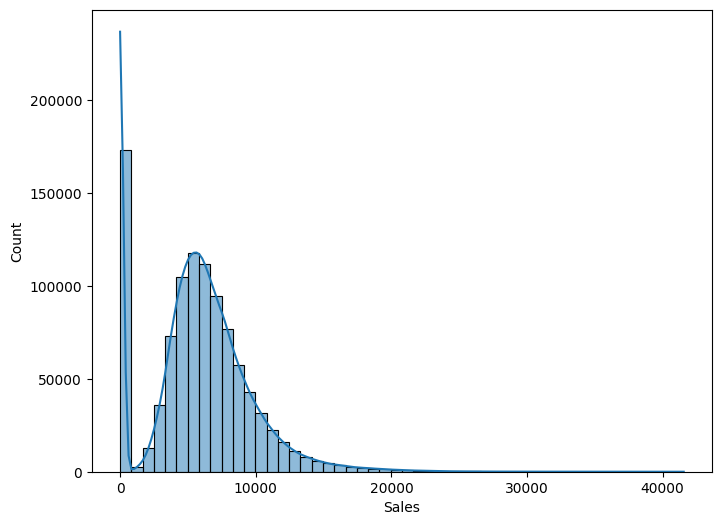

In [ ]:
# Chart - 1 visualization code
# Plotting histogram plot on rented bike count

plt.figure(figsize = (8,6))
sns.histplot(df['Sales'], bins = 50, kde = True)
plt.show()

##### 1. Why did you pick the specific chart?

- A histplot is a type of chart that displays the distribution of a dataset. It is a graphical representation of the data that shows how often each value or group of values occurs. Histplots are useful for understanding the distribution of a dataset and identifying patterns or trends in the data. It is also useful when dealing with large data sets . It can help detect any unusual observations or any gaps in the data.

##### 2. What is/are the insight(s) found from the chart?

From the visualization, we observe that the count of sales ranges between 0 to 833 is higher and performing good but The occurrences of sales count greater than 12000 are relatively scarce.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the above visualization reveals a positive business impact. A noteworthy aspect is that the count of Sales is significantly higher for values below 10000 Sales.

#### Chart - 2 Vizualization base on Month of sales

In [ ]:
monthly_total_sales = df.groupby('month')['Sales'].sum().reset_index()
print(monthly_total_sales)

    month      Sales
0       1  566728724
1       2  528734410
2       3  599831906
3       4  575895295
4       5  569248217
5       6  578112775
6       7  595059205
7       8  361791202
8       9  342570131
9      10  351878728
10     11  369498877
11     12  433831153


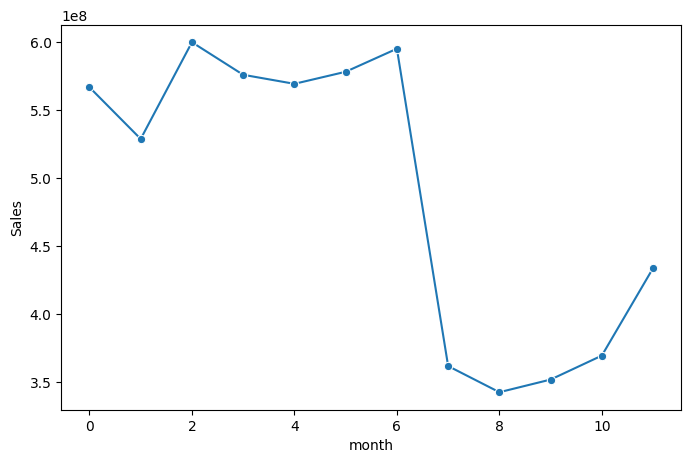

In [165]:
# Chart - 2 visualization code
plt.figure(figsize = (8,5))
total_Sales = df.groupby(df['month'])['Sales'].sum()
sns.lineplot(total_Sales,marker = 'o')
plt.show()

##### 1. Why did you pick the specific chart?

A line plot, also known as a line chart or line graph, is a way to visualize the trend of a single variable over time. It uses a series of data points connected by a line to show how the value of the variable changes over time.

Here to show the trend of the sum value of the sales with respective to the month.

##### 2. What is/are the insight(s) found from the chart?

From the observation, it is found that -
- The total sales count is highest at march.
- there is drastic reduce in sales from july to August
- There is a high in the sales from march to July.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can indeed help create a positive business impact. Understanding the patterns of sales demand during specific month can lead to targeted strategies, efficient resource allocation, and improved customer satisfaction. This knowledge can be leveraged to ensure sufficient store availability, maintenance, and customer support during peak months.

This presents an opportunity for the company to target customer  and implement strategies to meet this growing demand. It can include promotions for Stores, extended service hours, and efficient store maintenance during this period.

#### Chart - 3 Visualization base on Sales on Holiday and Day ofthe week

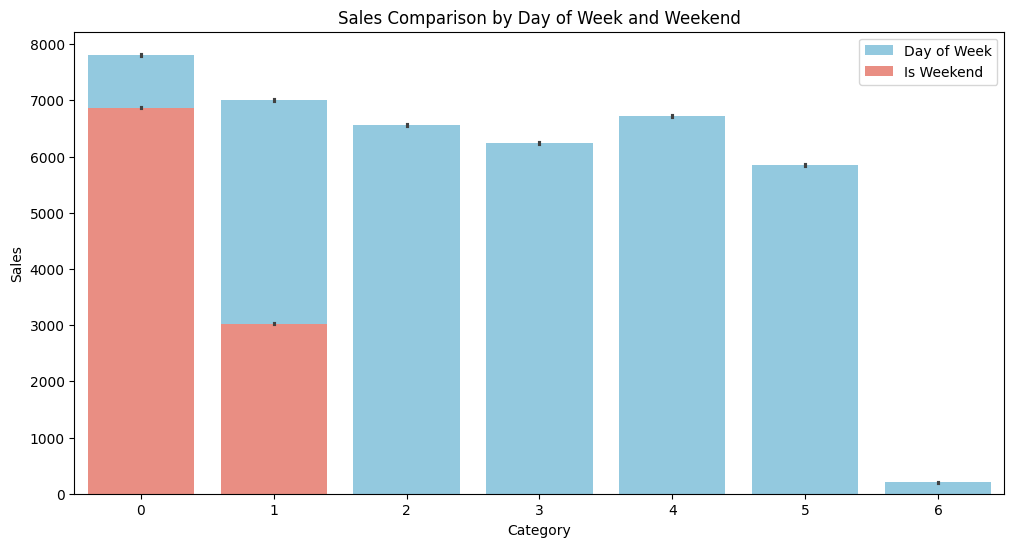

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame
# Assuming 'day_of_week', 'is_weekend', and 'Sales' are columns in your DataFrame

plt.figure(figsize=(12, 6))

# Grouped bar chart
sns.barplot(x='day_of_week', y='Sales', data=df, color='skyblue', label='Day of Week')
sns.barplot(x='is_weekend', y='Sales', data=df, color='salmon', label='Is Weekend')

plt.title('Sales Comparison by Day of Week and Weekend')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.legend()

plt.show()


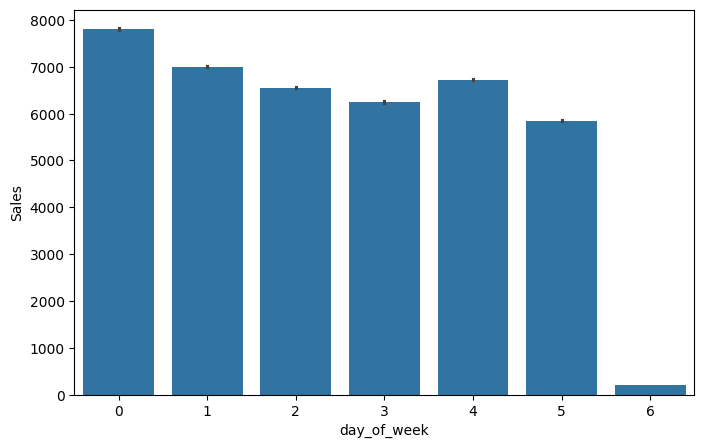

In [ ]:
# Chart - 3 visualization code
import matplotlib.pyplot as plt

# Analyzing the relationship between dependent variable and categorical variable
plt.figure(figsize = (8,5))
sns.barplot(x =df['day_of_week'], y = df['Sales'])
plt.show()


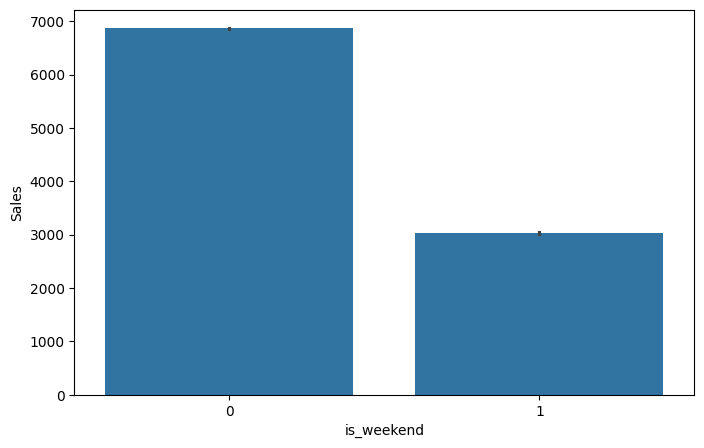

In [ ]:
import matplotlib.pyplot as plt

# Analyzing the relationship between dependent variable and categorical variable
plt.figure(figsize = (8,5))
sns.barplot(x =df['is_weekend'], y = df['Sales'])
plt.show()
# 1 for weekend , 0 for weekdays

##### 1. Why did you pick the specific chart?

**Bar** charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.
Here we used on this plots on catergorical independent variables with dependent variable.

##### 2. What is/are the insight(s) found from the chart?

The above analysis reveals the following insights:

Regarding the relationship between the day of the week and the count of Sales, it is evident that demand surges from sunday to friday, high trend at sunday in the week and lowest on saturday.

The count of Sales is notably higher on  weekdays.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4  Visualization base on Continuous independent variables

In [ ]:
# Chart - 4 visualization code
# Assigning the categorical and continuous varibles for the easy computational process.
dep_var = 'Sales'

cont_var = ['Store','CompetitionDistance']

cat_var = ['date','DayOfweek','month','StateHoliday','SchoolHoliday','is_weekend','Promo2','StoreType','Assortment','CompetitionOpenSinceMonth','CompetitionOpenSinceYear']

print(f'The continuous varibles are {cont_var}')
print(f'The categorical variables are {cat_var}')
print(f'The dependent variable is {dep_var}')

The continuous varibles are ['Store', 'CompetitionDistance']
The categorical variables are ['date', 'DayOfweek', 'month', 'StateHoliday', 'SchoolHoliday', 'is_weekend', 'Promo2', 'StoreType', 'Assortment', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear']
The dependent variable is Sales


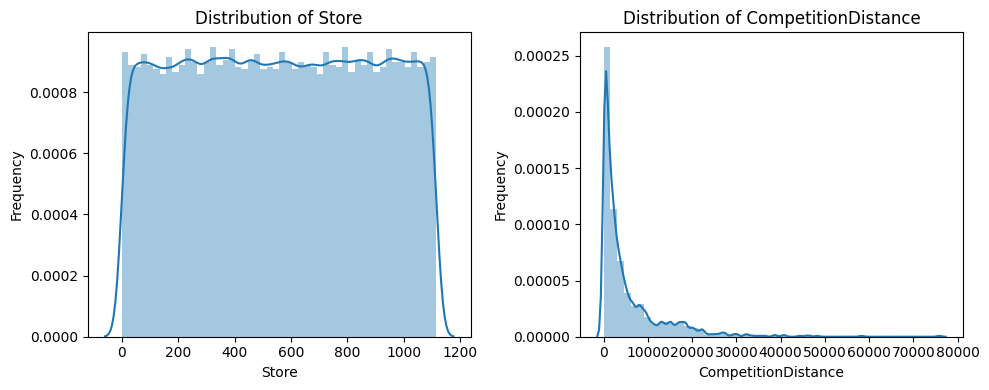

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'cont_var' is a list of continuous variable column names
num_plots = len(cont_var)
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

plt.figure(figsize=(10, 4 * num_rows))  # Adjust the figure size based on the number of plots

for i, col in enumerate(cont_var, start=1):
    plt.subplot(num_rows, num_cols, i)
    sns.distplot(df[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A histplot is a type of chart that displays the distribution of a dataset. It is a graphical representation of the data that shows how often each value or group of values occurs. Histplots are useful for understanding the distribution of a dataset and identifying patterns or trends in the data. It is also useful when dealing with large data sets . It can help detect any unusual observations or any gaps in the data.

##### 2. What is/are the insight(s) found from the chart?

From the above  analysis

- we got to know that Store shows normally distributed and Store Type shows different distributions.
- 'a' Type stores are highest and b type store are lowest available in market.
- compitition is started increased since year 2000.  


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the skewness of variables like Store, Store Type, Comptition, and Promo2 can aid in making informed decisions and improving various aspects of the business.These variables are negatively skewed could mean that compitition Distance  are relatively affecting to bussiness, allowing businesses to allocate appropriate resources for maintenance and infrastructure improvement.

#### Chart - 5  Visualization base on various  conditions

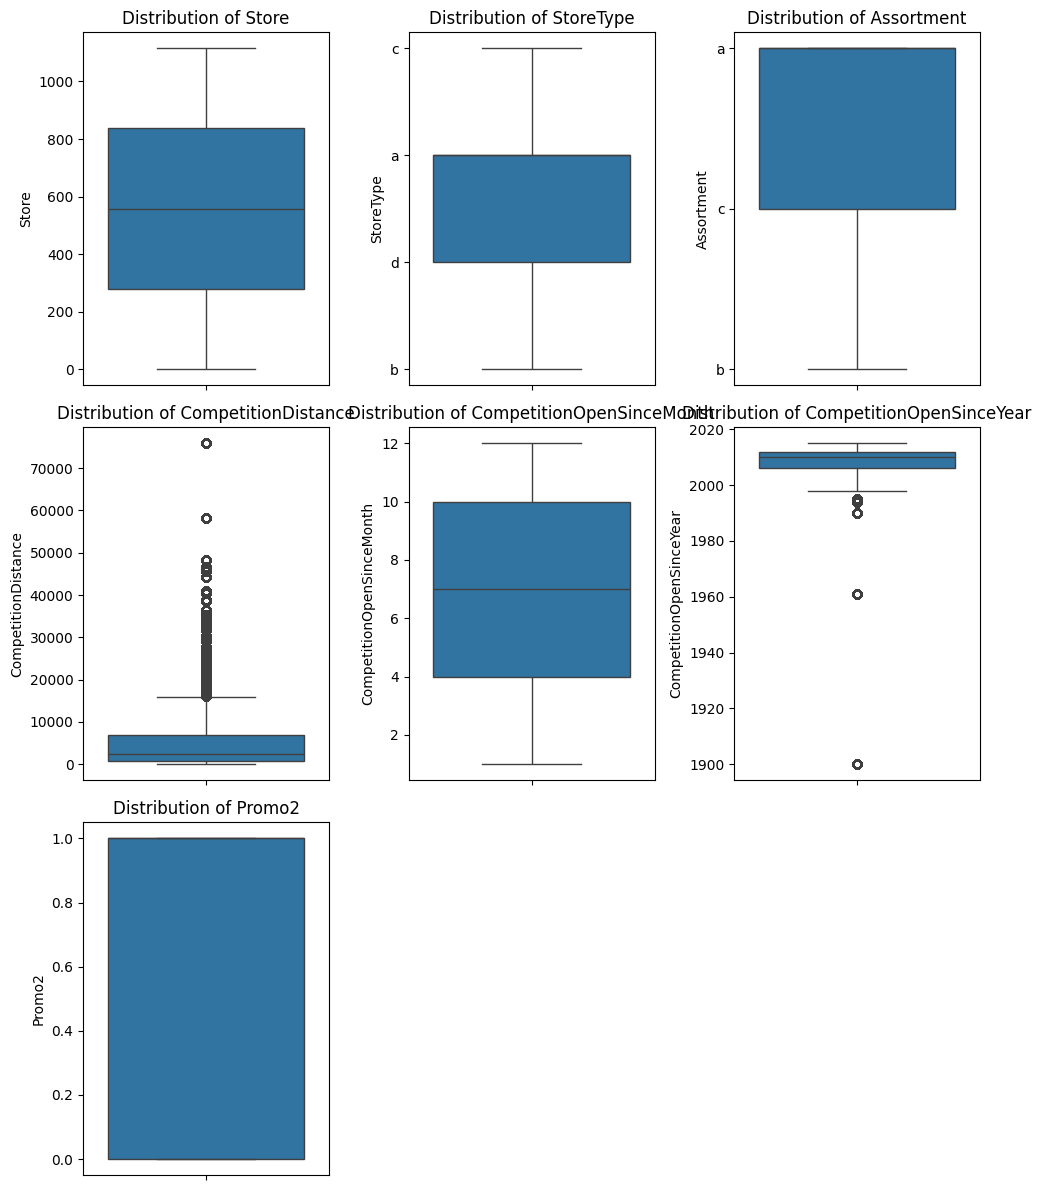

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'cont_var' is a list of continuous variable column names
num_plots = len(cont_var)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

plt.figure(figsize=(10, 4 * num_rows))  # Adjust the figure size based on the number of plots

for i, col in enumerate(cont_var, start=1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(y = df[col])
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A box plot is a standardized way of displaying the distribution of numerical data through quartiles. It provides a visual summary of the data's central tendency, spread, and symmetry, as well as highlighting potential outliers. Here we used on all numerical independent variables to find the spread.

##### 2. What is/are the insight(s) found from the chart?

from the above observation we found that

Store: The Store data spread is observed between 250 and 850, covering a range of Store.

StoreType: The data spread for StoreType lies between a and d, indicating a relatively consistent range of StoreType values.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


> On the Store consideration,Businesses can plan for increased store availability and ensure proper maintenance during peak seasons.

> CompetitionDistance : Competition Distance data is primarily distributed between 0 and 8000, indicating that the dataset mostly contains low distance values.




#### Chart - 6  Visualization base on various Sales, StoreType and Customer

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 20 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   StoreType                  1017209 non-null  int64  
 2   Assortment                 1017209 non-null  int64  
 3   CompetitionDistance        1017209 non-null  float64
 4   CompetitionOpenSinceMonth  1017209 non-null  float64
 5   CompetitionOpenSinceYear   1017209 non-null  float64
 6   Promo2                     1017209 non-null  int64  
 7   DayOfWeek                  1017209 non-null  int64  
 8   Date                       1017209 non-null  object 
 9   Sales                      1017209 non-null  int64  
 10  Customers                  1017209 non-null  int64  
 11  Open                       1017209 non-null  int64  
 12  Promo                      1017209 non-null  int64  
 13  StateHoliday

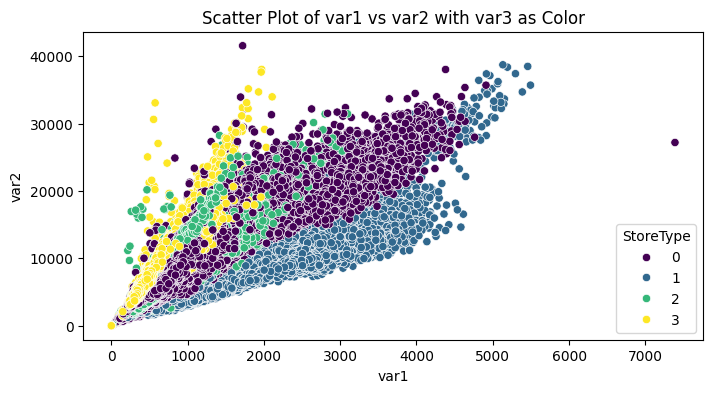

In [166]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'var1', 'var2', and 'var3' are the three variables
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Customers', y='Sales', hue='StoreType', data=df, palette='viridis')
plt.title('Scatter Plot of var1 vs var2 with var3 as Color')
plt.xlabel('var1')
plt.ylabel('var2')
plt.show()


#### Chart - 7 - Correlation Heatmap

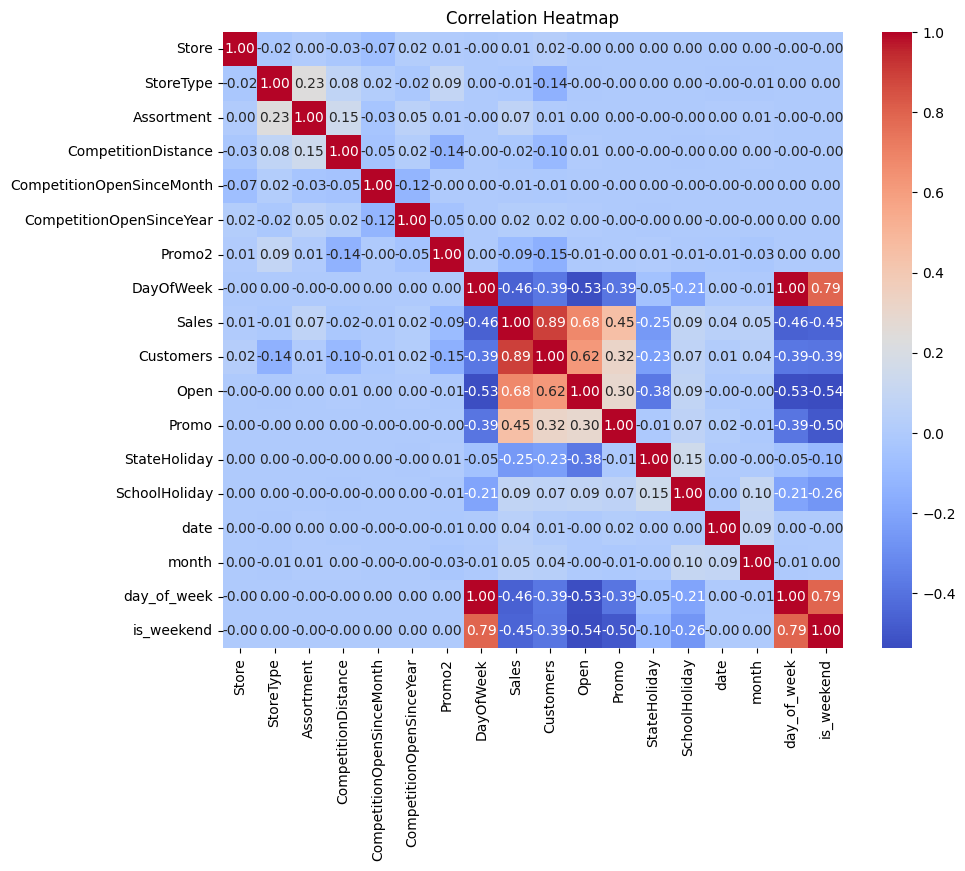

In [164]:
# Correlation Heatmap visualization code
# Correlation Heatmap visualization code
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with numerical columns
# Replace 'df' with your actual DataFrame
# Drop non-numeric columns if needed
numeric_columns = df.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


##### 1. Why did you pick the specific chart?

The correlation coefficient is a measure of the strength and direction of a linear relationship between two variables. A correlation matrix is used to summarize the relationships among a set of variables and is an important tool for data exploration and for selecting which variables to include in a model. The range of correlation is [-1,1].

If the value is towards 1, then there is a positive correlation which means if one variable value increases then the other value also increases.
If the value is towards -1 then there is negative correlation which means if one value increase then the other value decreases.

##### 2. What is/are the insight(s) found from the chart?

From the above analysis, the insights can be summarized as follows:
- Customer and Open exhibit a slight positive correlation with the count of Sales.
- Promo is slightly positively correlated with both Customer and Sales.
- Sales demonstrates a slight positive correlation with School Holiday.


#### Chart - 8 - Pair Plot

In [ ]:
df.dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
total_holiday                 object
date                          object
month                          int64
day_of_week                    int64
is_weekend                     int64
dtype: object

In [ ]:
df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
total_holiday                0
date                         0
month                        0
day_of_week                  0
is_weekend                   0
dtype: int64

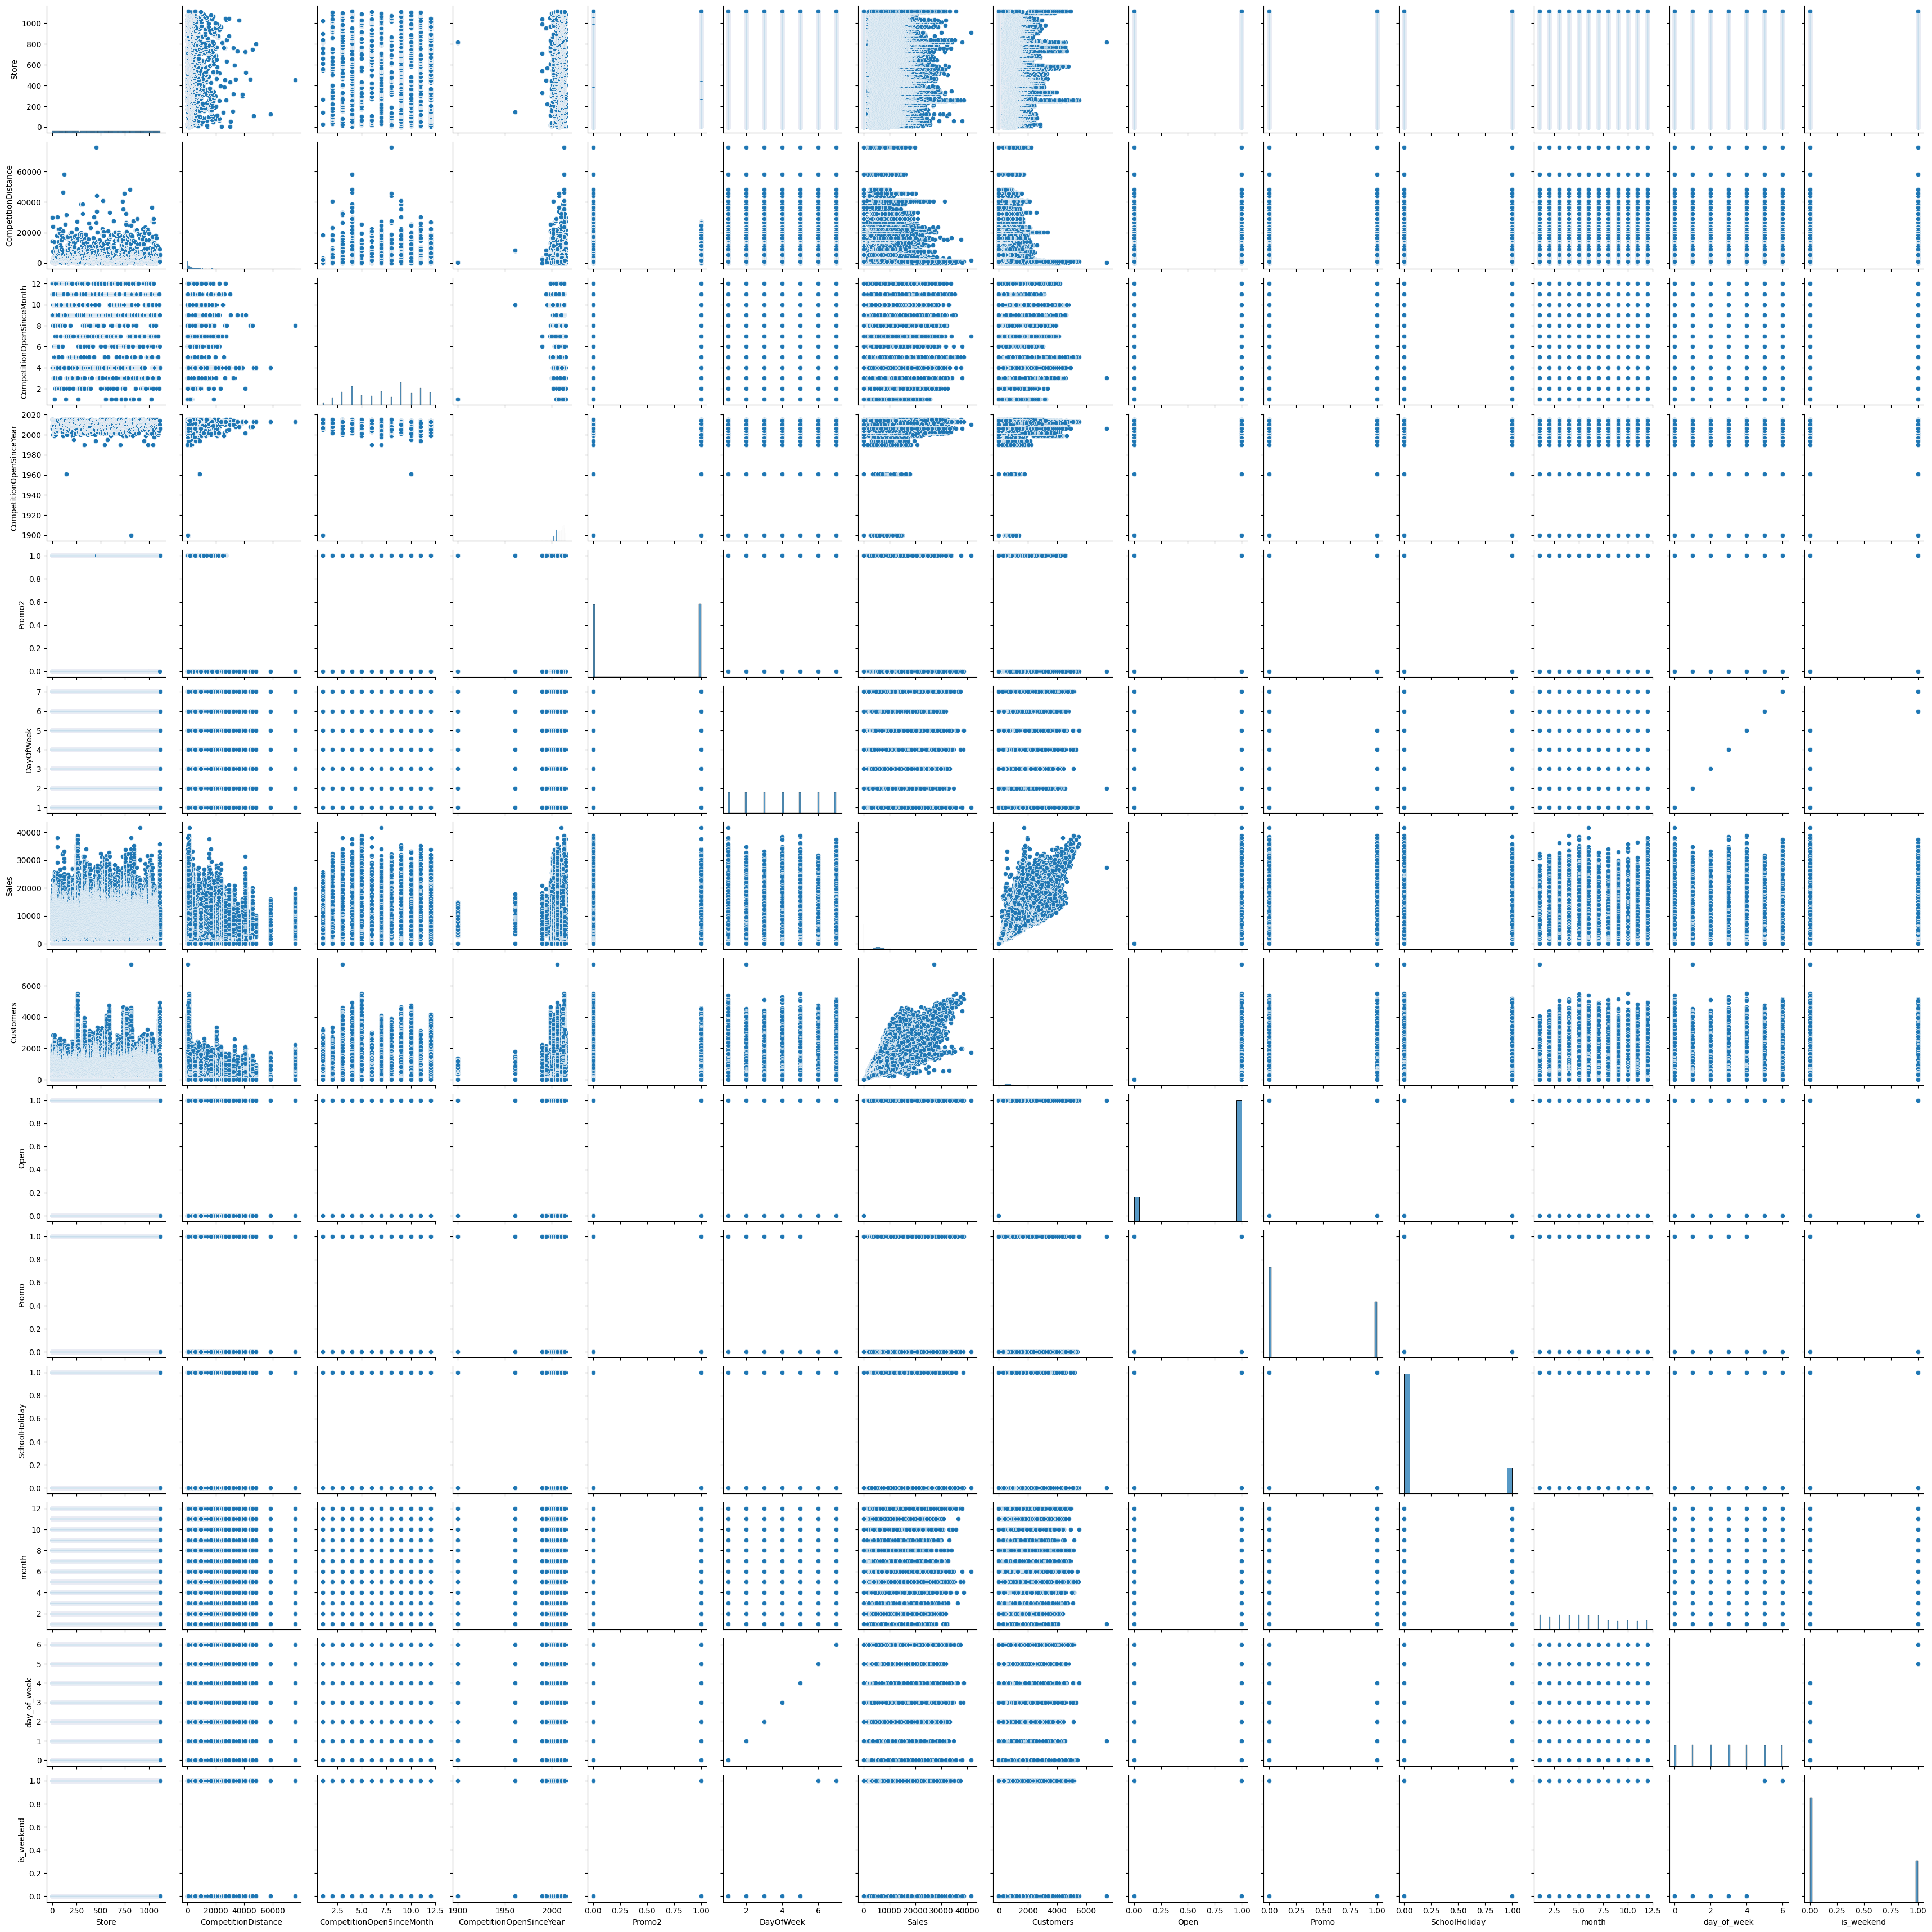

In [ ]:
# Pair Plot visualization code
import seaborn as sns
sns.pairplot(df)
plt.show()

##### 1. Why did you pick the specific chart?

A pairplot, also known as a scatterplot matrix, is a visualization that allows you to visualize the relationships between all pairs of variables in a dataset. It is a useful tool for data exploration because it allows you to quickly see how all of the variables in a dataset are related to one another.


##### 2. What is/are the insight(s) found from the chart?

From the above analysis, there is no strong linear realtionship between the variables whereas there is slightly relationship between the Sales and Store.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

For Normality test we take the below assumptions:
- Null Hypothesis: Data is normally distributed

- Alternate Hypothesis: Data is not normally disributed


#### 2. Perform an appropriate statistical test.

In [121]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import shapiro
test_data = df['Sales']

stats, p = shapiro(test_data)
print('stats = %.2f , p = %.3f' % (stats,p))

if p <= 0.05:
  print('Reject Null hypothesis i,e Data is not normally distributed')
else:
  print('Accept Null hypothesis i,e Data is normally distributed')

stats = 0.94 , p = 0.000
Reject Null hypothesis i,e Data is not normally distributed


##### Which statistical test have you done to obtain P-Value?

The Shapiro-Wilk test is used to obtain the p-value, which is an important parameter for accepting or rejecting the null hypothesis.

##### Why did you choose the specific statistical test?

The Shapiro-Wilk test is a statistical test used to assess whether a given dataset follows a normal distribution. It is widely used to check the normality of data, which is a common assumption in many statistical tests and models.

P-Value:

The Shapiro-Wilk test produces a p-value that quantifies the strength of evidence against the null hypothesis. A low p-value (typically below a significance level, such as 0.05) suggests that the data significantly deviates from a normal distribution, leading to the rejection of the null hypothesis. A high p-value indicates that there is no strong evidence to reject the assumption of normality.

- If the p-value is less than the chosen significance level (e.g., 0.05), you would reject the null hypothesis. This means that the data is not normally distributed.
- If the p-value is greater than the significance level, you would fail to reject the null hypothesis. This suggests that the data may be approximately normally distributed.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [122]:
# Handling Missing Values & Missing Value Imputation
print(df.isnull().sum())

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
total_holiday                0
date                         0
month                        0
day_of_week                  0
is_weekend                   0
dtype: int64


### 2. Handling Outliers

In [123]:
# Handling Outliers & Outlier treatments
# Handling Outliers & Outlier treatments
'''# Handling Outliers & Outlier treatments
# using IQR method to deal with Outliers
q1,median,q3 = df2['Sales'].quantile([0.25, 0.50,0.75])
iqr = q3 - q1
lower_limit = q1- (1.5 * iqr)
upper_limit = q3 + (1.5* iqr)
df2['Sales'] = np.where(df2['Sales'] > upper_limit,median, np.where(df2['Sales'] < lower_limit,median,df2['Sales']))

# Removing oultiers by using capping method
for col in df2[['Store', 'StoreType','Assortment','Promo']]:
  upper_limit = df2[col].quantile(0.99)
  df2[col] = np.where(df2[col] > upper_limit,upper_limit,df2[col])'''

"# Handling Outliers & Outlier treatments\n# using IQR method to deal with Outliers\nq1,median,q3 = df2['Sales'].quantile([0.25, 0.50,0.75])\niqr = q3 - q1\nlower_limit = q1- (1.5 * iqr)\nupper_limit = q3 + (1.5* iqr)\ndf2['Sales'] = np.where(df2['Sales'] > upper_limit,median, np.where(df2['Sales'] < lower_limit,median,df2['Sales']))\n\n# Removing oultiers by using capping method\nfor col in df2[['Store', 'StoreType','Assortment','Promo']]:\n  upper_limit = df2[col].quantile(0.99)\n  df2[col] = np.where(df2[col] > upper_limit,upper_limit,df2[col])"

##### What all outlier treatment techniques have you used and why did you use those techniques?

Here, we used IQR and capping method,basis on IQR method we set upper limit and lower limit of rented bike count variable values and convert those outliers into median values.


### 3. Categorical Encoding

In [124]:
# Check Unique Values for each variable.
unique_counts = df.nunique()

# Print the number of unique values for each column
print("Number of unique values in each column:")
print(unique_counts)

Number of unique values in each column:
Store                         1115
StoreType                        4
Assortment                       3
CompetitionDistance            655
CompetitionOpenSinceMonth       12
CompetitionOpenSinceYear        23
Promo2                           2
DayOfWeek                        7
Date                           942
Sales                        21734
Customers                     4086
Open                             2
Promo                            2
StateHoliday                     3
SchoolHoliday                    2
total_holiday                    4
date                           942
month                           12
day_of_week                      7
is_weekend                       2
dtype: int64


In [125]:
temp_df = pd.DataFrame(df)

temp_df['StateHoliday'] = pd.to_numeric(temp_df['StateHoliday'], errors='coerce')

In [126]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd



# Identify categorical columns
categorical_columns = ['StoreType', 'Assortment', 'StateHoliday', 'date','month','SchoolHoliday','is_weekend','Promo2','CompetitionOpenSinceMonth','CompetitionOpenSinceYear', 'day_of_week', 'Open', 'Promo', 'month']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to categorical columns
for col in categorical_columns:
    temp_df[col] = label_encoder.fit_transform(temp_df[col])

# Display the modified DataFrame
temp_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 20 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   StoreType                  1017209 non-null  int64  
 2   Assortment                 1017209 non-null  int64  
 3   CompetitionDistance        1017209 non-null  float64
 4   CompetitionOpenSinceMonth  1017209 non-null  int64  
 5   CompetitionOpenSinceYear   1017209 non-null  int64  
 6   Promo2                     1017209 non-null  int64  
 7   DayOfWeek                  1017209 non-null  int64  
 8   Date                       1017209 non-null  object 
 9   Sales                      1017209 non-null  int64  
 10  Customers                  1017209 non-null  int64  
 11  Open                       1017209 non-null  int64  
 12  Promo                      1017209 non-null  int64  
 13  StateHoliday

#### What all categorical encoding techniques have you used & why did you use those techniques?

We used the One-Hot encoding technique for encoding. This method is employed to transform non-numeric labels or classes into a numerical format that can be processed by machine learning algorithms. We applied this technique to the following categorical variables: 'month','day_of_week','StoreType','Promo2'and'Open'.



### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

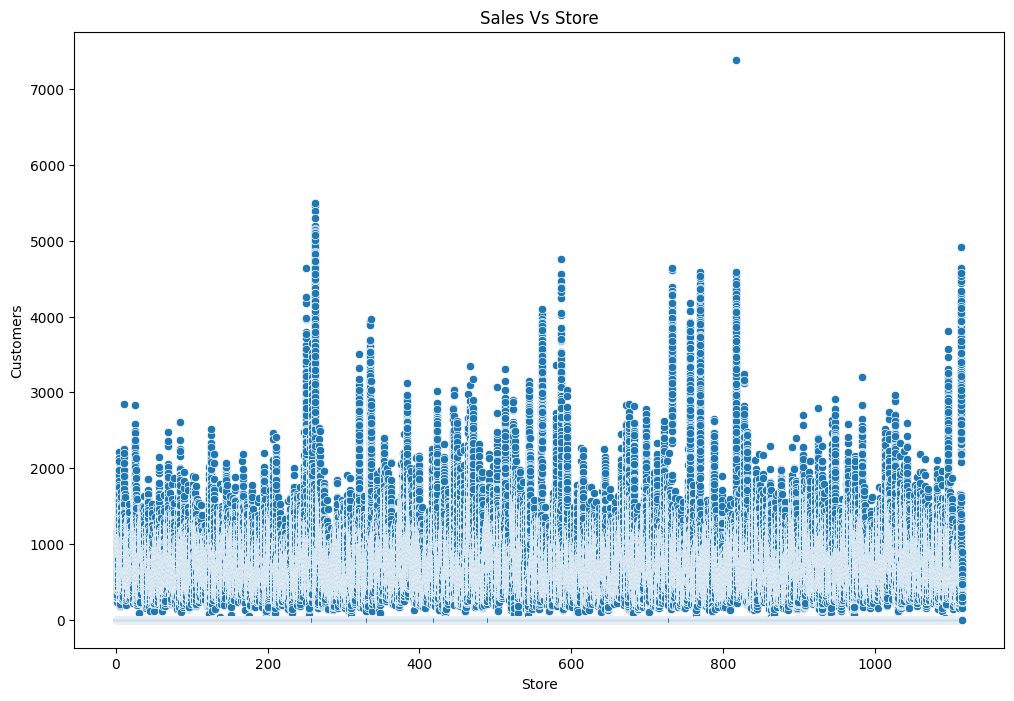

In [127]:
# Manipulate Features to minimize feature correlation and create new features
# Manipulate Features to minimize feature correlation and create new features
# Using scatter plots
plt.figure(figsize =(12,8))
sns.scatterplot(x = temp_df['Store'], y= temp_df['Customers'])
plt.title('Sales Vs Store')
plt.show()

#### 2. Feature Selection


In [128]:
# Select your features wisely to avoid overfitting
features = [i for i in df.columns if i not in ['Sales','Customer','Store']]
features

['StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'DayOfWeek',
 'Date',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'total_holiday',
 'date',
 'month',
 'day_of_week',
 'is_weekend']

In [129]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [130]:
# separating the continous variables from the dataset to analyze the multicolinearity
continous_var = ['Store','Customers']
continous_var_df = pd.DataFrame(temp_df[continous_var])
continous_var_df

,Store,Customers
0,1,555
1,1,546
2,1,523
3,1,560
4,1,612
...,...,...
1017204,1115,339
1017205,1115,326
1017206,1115,300
1017207,1115,305


In [131]:
import numpy as np

In [132]:
# replacing infinity values with nan values
temp_df = temp_df.replace([np.inf, -np.inf], np.nan)

In [133]:
# calculating VIF using the above function
calc_vif(temp_df[[i for i in continous_var_df]])

,variables,VIF
0,Store,1.992466
1,Customers,1.992466


In [134]:
temp_df.drop(['total_holiday','Date'], axis = 1,inplace = True)

In [135]:
temp_df['CompetitionDistance'] = temp_df['CompetitionDistance'].astype(int)

In [136]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype
---  ------                     --------------    -----
 0   Store                      1017209 non-null  int64
 1   StoreType                  1017209 non-null  int64
 2   Assortment                 1017209 non-null  int64
 3   CompetitionDistance        1017209 non-null  int64
 4   CompetitionOpenSinceMonth  1017209 non-null  int64
 5   CompetitionOpenSinceYear   1017209 non-null  int64
 6   Promo2                     1017209 non-null  int64
 7   DayOfWeek                  1017209 non-null  int64
 8   Sales                      1017209 non-null  int64
 9   Customers                  1017209 non-null  int64
 10  Open                       1017209 non-null  int64
 11  Promo                      1017209 non-null  int64
 12  StateHoliday               1017209 non-null  int64
 13  SchoolHoliday              1017209 non-nul

In [137]:
temp_df.head(6)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,date,month,day_of_week,is_weekend
0,1,2,0,1270,8,15,0,5,5263,555,1,1,0,1,941,6,4,0
1,1,2,0,1270,8,15,0,4,5020,546,1,1,0,1,940,6,3,0
2,1,2,0,1270,8,15,0,3,4782,523,1,1,0,1,939,6,2,0
3,1,2,0,1270,8,15,0,2,5011,560,1,1,0,1,938,6,1,0
4,1,2,0,1270,8,15,0,1,6102,612,1,1,0,1,937,6,0,0
5,1,2,0,1270,8,15,0,7,0,0,0,0,0,0,936,6,6,1


In [138]:
# Final number of rows and columns in dataset
print(f'The number of rows {temp_df.shape[0]}')
print(f'The number of columns {temp_df.shape[1]}')

The number of rows 1017209
The number of columns 18


##### What all feature selection methods have you used  and why?

We have used VIF technique and pearson cofficient heatmap to find the multicolinearity between the variables and dependent vairable.

 VIF is a measure that quantifies the degree to which the variance of the estimated regression coefficients in a regression model increases when your predictors are correlated. High VIF values indicate multicollinearity, which can lead to unstable and unreliable regression coefficients.
 - VIF > 5 tends to high multicolinearity.

##### Which all features you found important and why?

From the above analysis, there is a high correlation between Sales and Customer.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

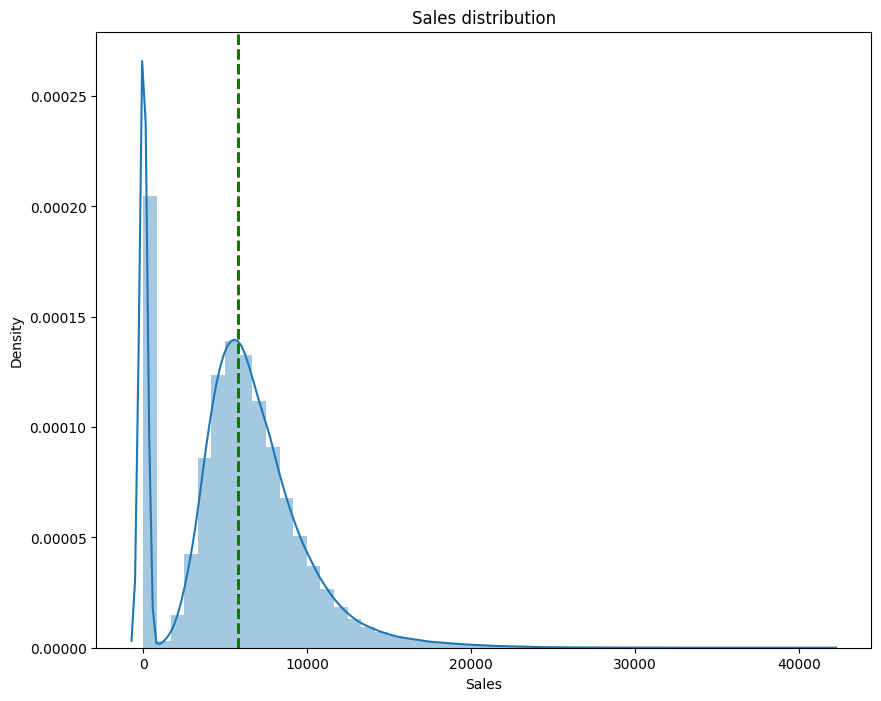

In [139]:
# Transform Your data
# Transform Your data
# Visualizing the distribution of dependent variables
plt.figure(figsize = (10,8))
sns.distplot(temp_df['Sales'])
plt.title('Sales distribution')
plt.axvline(temp_df['Sales'].mean(),color = 'red',linestyle = 'dashed', linewidth = 2 )
plt.axvline(temp_df['Sales'].median(),color = 'green',linestyle = 'dashed', linewidth = 2 )
plt.show()

In [140]:
# skewness of the dependent varibale
temp_df['Sales'].skew()

0.6414596158103798

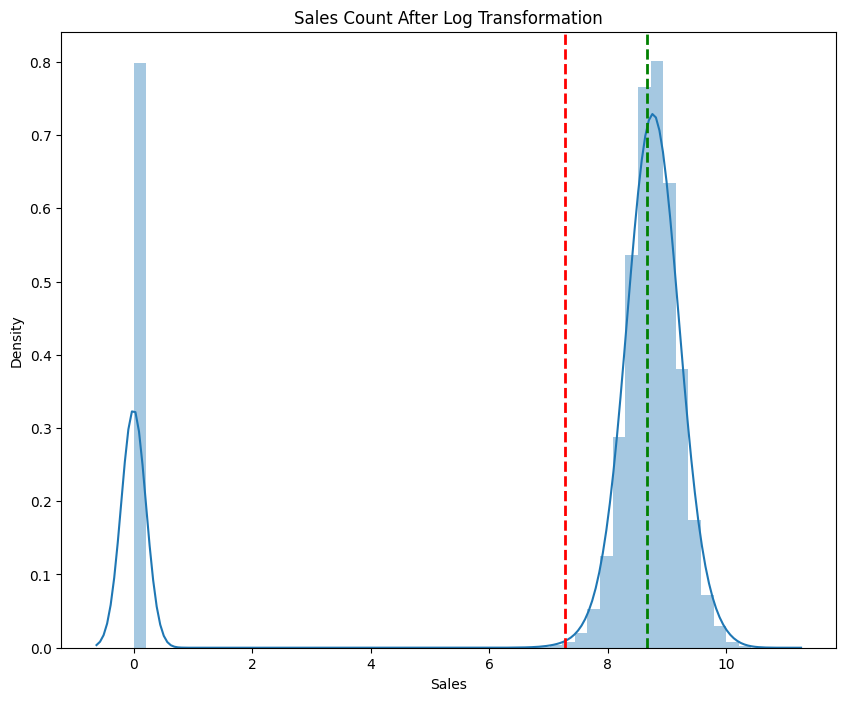

In [141]:
# # Applying log transformation to the dependent variable and its distribution
plt.figure(figsize = ( 10,8))
sns.distplot(np.log1p(temp_df['Sales']))
plt.title('Sales Count After Log Transformation')
plt.axvline(np.log1p(temp_df['Sales']).mean(), color = 'red', linestyle = 'dashed', linewidth = 2)
plt.axvline(np.log1p(temp_df['Sales']).median(), color = 'green', linestyle = 'dashed', linewidth = 2)
plt.show()

In [142]:
np.log1p(temp_df['Sales']).skew()

-1.7033487946550332

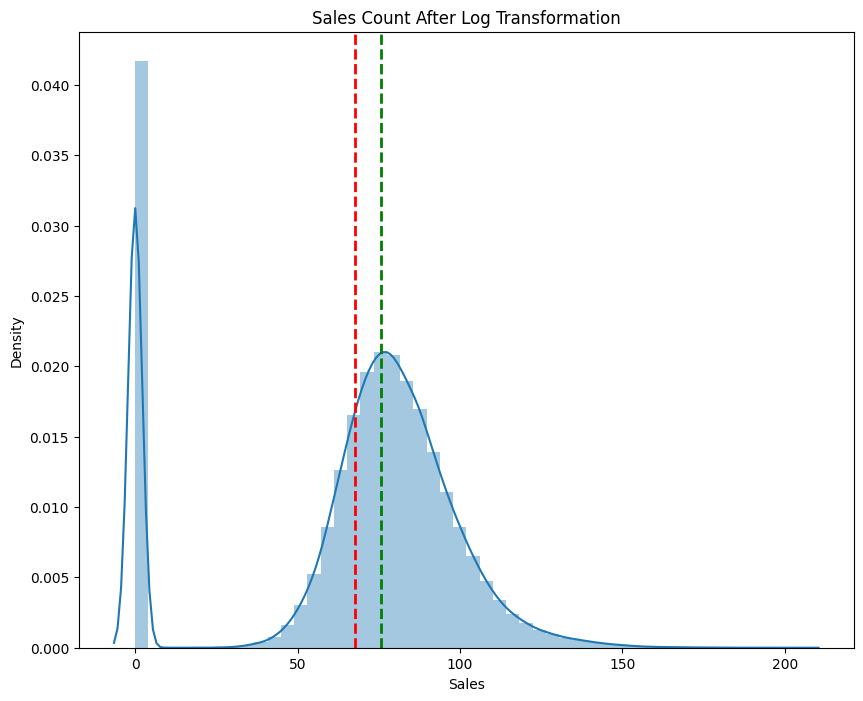

In [143]:
# Applying square root transformation to the dependent variable and its distribution
plt.figure(figsize = ( 10,8))
sns.distplot(np.sqrt(temp_df['Sales']))
plt.title('Sales Count After Log Transformation')
plt.axvline(np.sqrt(temp_df['Sales']).mean(), color = 'red', linestyle = 'dashed', linewidth = 2)
plt.axvline(np.sqrt(temp_df['Sales']).median(), color = 'green', linestyle = 'dashed', linewidth = 2)
plt.show()

In [144]:
np.sqrt(temp_df['Sales']).skew()

-0.8970825142894521

#### After plotting distribution plots and performing normality tests, we observed that our data was normally distributed. we have also tried applied log and square root transformations to our data with the aim of achieving a normal distributionBut Based on the skewness values, our data appeared to approach a negative distribution.

### 6. Data Scaling

In [145]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype
---  ------                     --------------    -----
 0   Store                      1017209 non-null  int64
 1   StoreType                  1017209 non-null  int64
 2   Assortment                 1017209 non-null  int64
 3   CompetitionDistance        1017209 non-null  int64
 4   CompetitionOpenSinceMonth  1017209 non-null  int64
 5   CompetitionOpenSinceYear   1017209 non-null  int64
 6   Promo2                     1017209 non-null  int64
 7   DayOfWeek                  1017209 non-null  int64
 8   Sales                      1017209 non-null  int64
 9   Customers                  1017209 non-null  int64
 10  Open                       1017209 non-null  int64
 11  Promo                      1017209 non-null  int64
 12  StateHoliday               1017209 non-null  int64
 13  SchoolHoliday              1017209 non-nul

In [146]:
from sklearn.preprocessing import MinMaxScaler

# Sample DataFrame with features and target
# df = ...

# Separate features and target
X = temp_df.drop('Sales', axis=1)  # Features
y = temp_df['Sales']  # Target

# Instantiate MinMaxScaler for features
feature_scaler = MinMaxScaler()

# Fit and transform features
X_scaled = feature_scaler.fit_transform(X)

# Create a new DataFrame with scaled features
scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Display the scaled DataFrame
print(scaled_df)


         Store  StoreType  Assortment  CompetitionDistance  \
0          0.0   0.666667         0.0             0.016482   
1          0.0   0.666667         0.0             0.016482   
2          0.0   0.666667         0.0             0.016482   
3          0.0   0.666667         0.0             0.016482   
4          0.0   0.666667         0.0             0.016482   
...        ...        ...         ...                  ...   
1017204    1.0   1.000000         1.0             0.070280   
1017205    1.0   1.000000         1.0             0.070280   
1017206    1.0   1.000000         1.0             0.070280   
1017207    1.0   1.000000         1.0             0.070280   
1017208    1.0   1.000000         1.0             0.070280   

         CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                         0.727273                  0.681818     0.0   
1                         0.727273                  0.681818     0.0   
2                         0.727273     

##### Which method have you used to scale you data and why?

As our data is having different independent variables with different scales, so we used MinMaxScaler to convert all the variables into one scale.

Min-Max Scaling scales the data to a specific range, usually [0, 1].



### 8. Data Splitting

In [147]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Split your data to train and test. Choose Splitting ratio wisely.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

##### What data splitting ratio have you used and why?

To train the model, we have split the data using train test split method. Here, we have taken 80% of data for training and 20% for testing.

## ***7. ML Model Implementation***

In [222]:
# # Defining a function to print evaluation matrix
def evaluation_matrix(model, y_test,y_pred):
  """In this function, the inputs are the model, y_test,y_pred values to calculate the actual and predicted values of the model,
  Plots the top 20 features with the score chart"""
  # sqauring on the parameters of y_test and y_pred as we have used square root transformation.
  y_te = np.square(y_test)
  y_pr = np.square(y_pred)
  y_train2 = np.square(y_train)
  y_train_pred = np.square(model.predict(X_train))

  # Calculating the evaluation matrix
  mse = mean_squared_error(y_te,y_pr)
  mae = mean_absolute_error(y_te,y_pr)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_te,y_pr)
  adjusted_r2 = 1 - (1 - r2)*((len(X_test) - 1)/(len(X_test) - X_test.shape[1] - 1))
  r2_train = r2_score(y_train2, y_train_pred)

  # Printing the evaluation matrix
  print('MSE: ',mse)
  print('MAE: ',mae)
  print('RMSE: ',rmse)
  print('Train R2:',r2_train)
  print('Test R2: ',r2)
  print('Adjusted R2:',adjusted_r2)

  # Plot Actual and Predicted values
  plt.figure(figsize = ( 18,6))
  plt.plot((y_pr)[:100])
  plt.plot((np.array(y_te)[:100]))
  plt.title('Actual and Predicted Sales Counts',fontsize = 18)
  plt.legend(['Predicted','Actual'])



  model_scores = [mse,mae,rmse,r2,r2_train,adjusted_r2]
  return model_scores

### ML Model - 1 LINEAR REGRESSION

In [223]:
# ML Model - 1 Implementation
lr = LinearRegression()
# Fit the Algorithm
lr.fit(X_train,y_train)
# Predict on the model
y_pred_li = lr.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

MSE:  1016880398504471.9
MAE:  14402685.016302442
RMSE:  31888562.189356733
Train R2: 0.7131374201888441
Test R2:  0.7187977918042836
Adjusted R2: 0.71877429193436


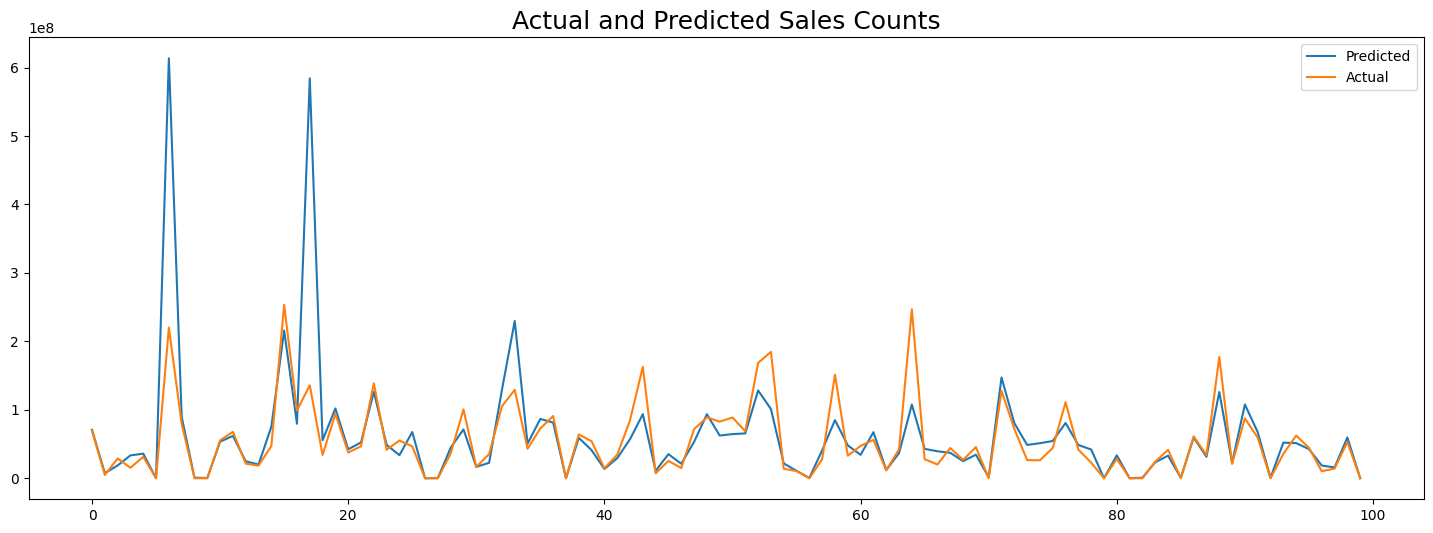

In [224]:
# Visualizing evaluation Metric Score chart
from sklearn.metrics import mean_absolute_error
from collections import defaultdict
scores = defaultdict(dict)

linear_model = evaluation_matrix(lr,y_test,y_pred_li)
scores['Linear Regression'] = linear_model

#### 2. Cross- Validation & Hyperparameter Tuning

In [225]:
from sklearn.model_selection import cross_val_score

# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
model = LinearRegression()

# Fit the Algorithm
cross_val_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Predict on the model
# Display cross-validation scores
print("Cross-Validation Scores:")
print(cross_val_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_score = cross_val_scores.mean()
std_score = cross_val_scores.std()

print(f"\nMean Cross-Validation Score: {mean_score}")
print(f"Standard Deviation of Cross-Validation Scores: {std_score}")


Cross-Validation Scores:
[-1314166.38994716 -2000508.6963312  -1681829.85038571 -2924021.12150352
 -1923527.77502223]

Mean Cross-Validation Score: -1968810.7666379646
Standard Deviation of Cross-Validation Scores: 534115.9867191324


In [226]:
# Define the model
from sklearn.model_selection import GridSearchCV
reg = LinearRegression()

# Define the parameters to be optimized
param_grid = {'positive':[True, False]}  #When set to True, forces the coefficients to be positive

# Perform grid search
grid_search = GridSearchCV(reg, param_grid, cv=5, scoring='r2', return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'positive': [True, False]}, return_train_score=True,
             scoring='r2')

In [227]:
# printing the best parameters and its score
print('The best parameters',grid_search.best_params_)
print('Best r2 score', grid_search.best_score_)

The best parameters {'positive': False}
Best r2 score 0.8691275882578167


In [228]:
# Fitting the best model
best_lr = grid_search.best_estimator_
best_lr.fit(X_train, y_train)

LinearRegression()

In [229]:
# predicting on test data
y_pred_lr_best = best_lr.predict(X_test)

MSE:  1016880398504471.9
MAE:  14402685.016302442
RMSE:  31888562.189356733
Train R2: 0.7131374201888441
Test R2:  0.7187977918042836
Adjusted R2: 0.71877429193436


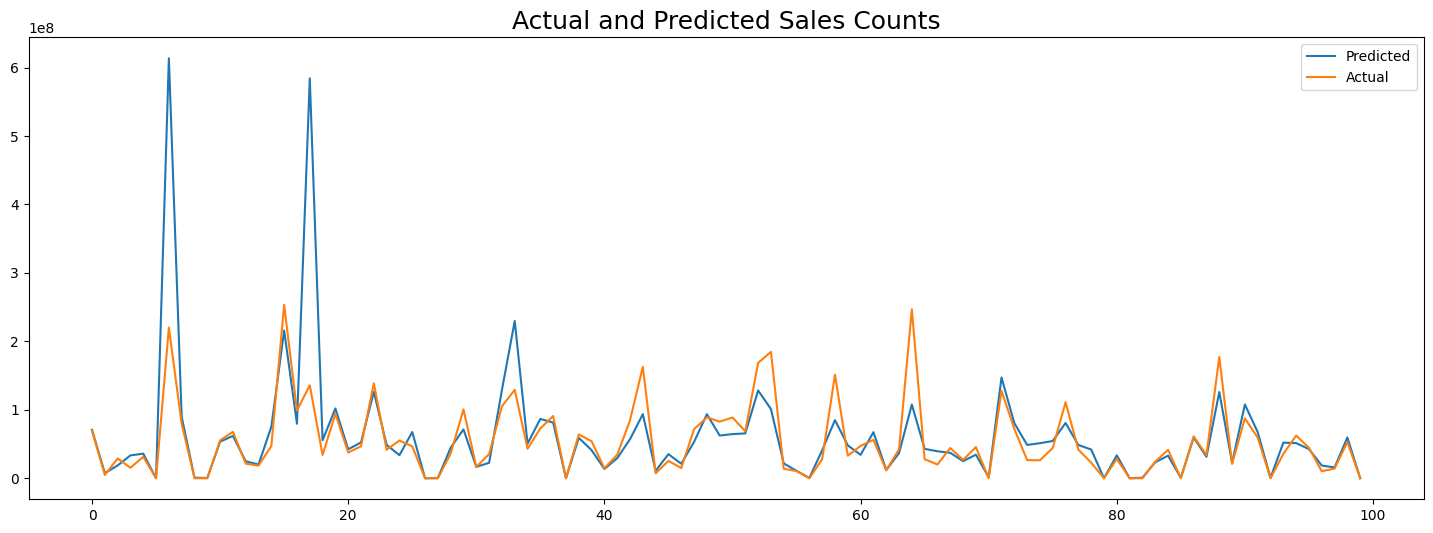

In [230]:
linear_model_tuned = evaluation_matrix(best_lr,y_test,y_pred_lr_best)
scores['linear regression tuned'] = linear_model_tuned

##### Which hyperparameter optimization technique have you used and why?

We have used GridSearchCV to reduce time and effort. GridSearchCV is used to find the best hyperparameters for a machine learning model by searching over a specified parameter grid. It helps ensure that a model is not overfitting or underfitting by evaluating the model's performance using cross-validation techniques. This approach can save time and resources compared to manually tuning the parameters of a model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [231]:
scores

defaultdict(dict,
            {'Linear Regression': [1016880398504471.9,
              14402685.016302442,
              31888562.189356733,
              0.7187977918042836,
              0.7131374201888441,
              0.71877429193436],
             'linear regression tuned': [1016880398504471.9,
              14402685.016302442,
              31888562.189356733,
              0.7187977918042836,
              0.7131374201888441,
              0.71877429193436]})

### ML Model - 2 Lasso Regression

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [232]:
# Visualizing evaluation Metric Score chart
from sklearn.linear_model import Lasso
# Importing the lasso class
las = Lasso()

# fitting the lasso reggression model on dataset
las.fit(X_train,y_train)

# predicting the model on test data
y_pred_las= las.predict(X_test)

MSE:  1018442802820911.0
MAE:  14402443.308063922
RMSE:  31913050.66616025
Train R2: 0.7127163241961334
Test R2:  0.7183657335754857
Adjusted R2: 0.7183421975987612


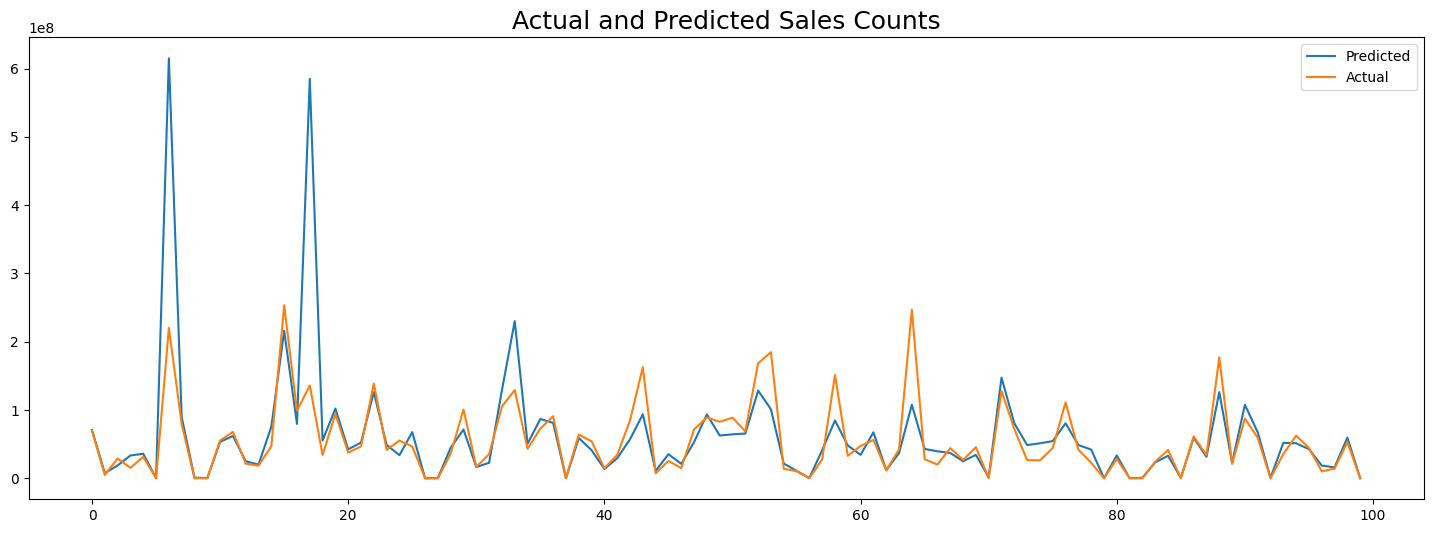

In [233]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm
# Visualizing evaluation Metric Score chart
lasso_regression = evaluation_matrix(las, y_test,y_pred_las)
scores['Lasso Regression'] = lasso_regression

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

We have used GridSearchCV to reduce time and effort. GridSearchCV is used to find the best hyperparameters for a machine learning model by searching over a specified parameter grid. It helps ensure that a model is not overfitting or underfitting by evaluating the model's performance using cross-validation techniques. This approach can save time and resources compared to manually tuning the parameters of a model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [234]:
scores

defaultdict(dict,
            {'Linear Regression': [1016880398504471.9,
              14402685.016302442,
              31888562.189356733,
              0.7187977918042836,
              0.7131374201888441,
              0.71877429193436],
             'linear regression tuned': [1016880398504471.9,
              14402685.016302442,
              31888562.189356733,
              0.7187977918042836,
              0.7131374201888441,
              0.71877429193436],
             'Lasso Regression': [1018442802820911.0,
              14402443.308063922,
              31913050.66616025,
              0.7183657335754857,
              0.7127163241961334,
              0.7183421975987612]})

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

RMSE & MSE are measuring the average squared values between the predicted and actual values.

Whereas R2 score is a measure how well the model fits the data.

In a business context, a low RMSE and high R2 score would indicate that the model is making accurate predictions and is a good fit for the data. This would be desirable for a business because it would mean that the model is able to provide useful insights and make accurate predictions about future outcomes.

### ML Model - 3 Random Forest

In [235]:
from sklearn.ensemble import RandomForestRegressor

# Implementation of algorithm
rf = RandomForestRegressor(random_state = 1 )

# fitting the data on the model
rf.fit(X_train,y_train)

# predicting on the test data
y_pred_rf = rf.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

MSE:  103182593478007.1
MAE:  4336594.310464411
RMSE:  10157883.316813946
Train R2: 0.9955771305392103
Test R2:  0.9714664839876458
Adjusted R2: 0.9714640994618661


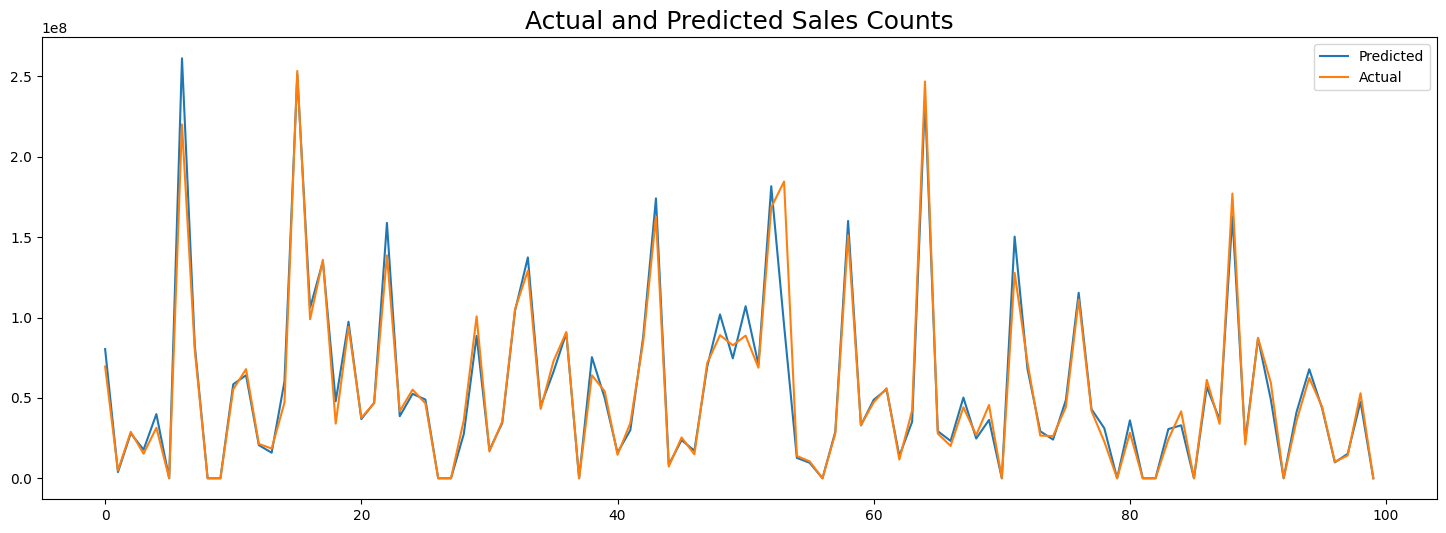

In [236]:
# Visualizing evaluation Metric Score chart
#visualization on evaluation matrix
rf_best = evaluation_matrix(rf,y_test,y_pred_rf)
scores['Random forest'] = rf_best

### Plotting of R2_scores

In [174]:
scores = pd.DataFrame(scores)

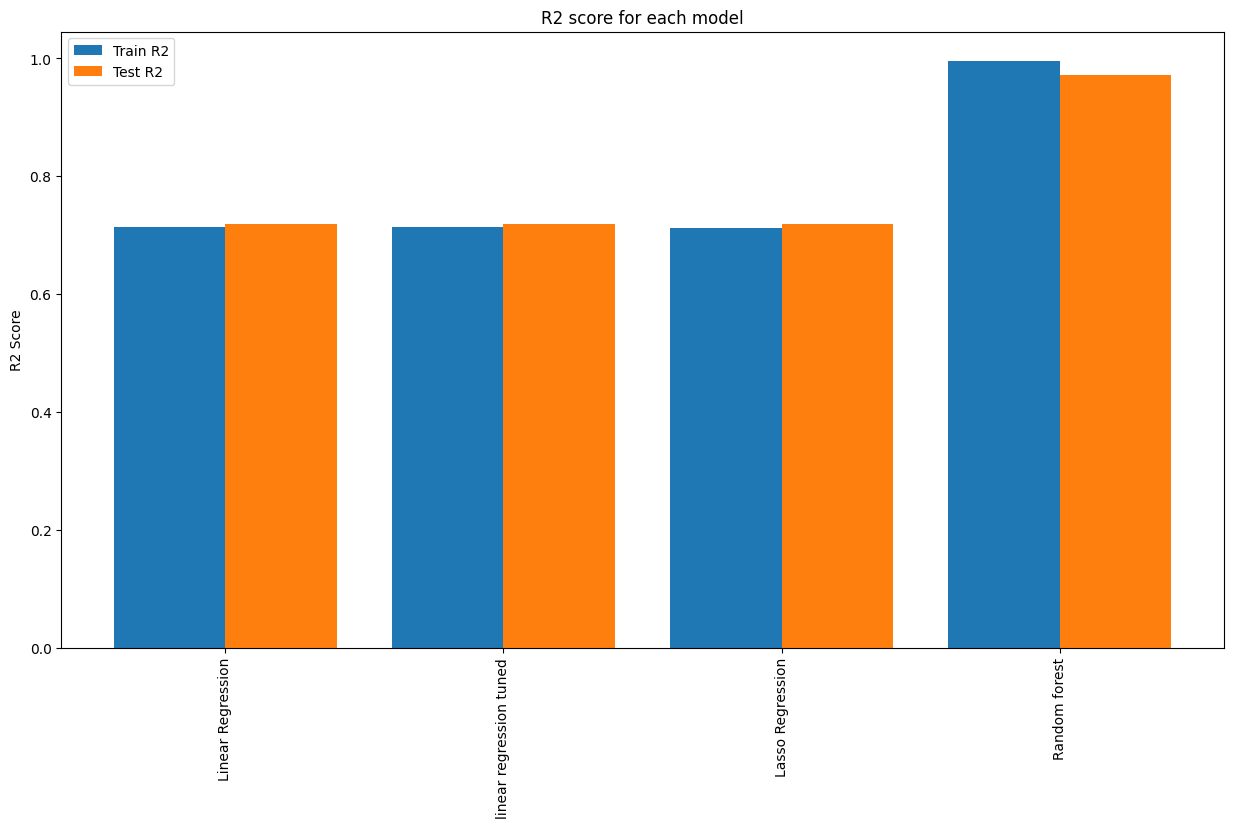

In [175]:
train  = scores.iloc[-2,:] #extracting the r2_train row
test = scores.iloc[-3,:]  #extracting the r2_test row)

model = list(scores.columns)
X_axis = np.arange(len(model))

# plotting the graph
plt.figure(figsize = (15,8))
plt.bar(X_axis - 0.2,train,0.4, label = 'Train R2')
plt.bar(X_axis + 0.2, test, 0.4, label = 'Test R2')


plt.xticks(X_axis,model,rotation = 'vertical')
plt.title('R2 score for each model')
plt.ylabel('R2 Score')
plt.legend()
plt.show()

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

We consider R2 score as evaluation matrics for the above models. It is a statistical measure that represents the proportion of the variance in the dependent variable that is explained by the independent variables in a regression model.It is the best parameter to check the feasibility of the model.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

We have performed on many models like linear regression, Lasso Regression, random forest. Amongst of them, Random forest tuned regressor has the best metrics i.e the training r2 score is 99%.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [240]:
# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Optionally, print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Train the best model on the entire training set (if needed)
best_model.fit(X_train, y_train)

# Evaluate the best model on the validation set (or test set)
accuracy = best_model.score(X, y)
print("Validation Accuracy of the Best Model:", accuracy)

# Save the best model using joblib or pickle
joblib.dump(best_model, 'best_model.joblib')

Best Hyperparameters: {'positive': False}
Validation Accuracy of the Best Model: 0.8693525642348459


['best_model.joblib']

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [242]:
import joblib

# Load the saved model
loaded_model = joblib.load('best_model.joblib')

# Make predictions
predictions = loaded_model.predict(X_test)

# Optionally, print or use the predictions as needed
print("Predictions:", predictions)


Predictions: [8408.1617794  2744.93933721 4328.06356103 ... 5501.26149691 6275.15046398
 9476.90807693]


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***